In [1]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib.pyplot as plt
import glob     
import re
import numpy as np
import pandas as pd
from heatflux_functions import *
from data_accessors import *
import xarray as xr

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15


plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams.update({'font.size': 14})


def replace_guards(var):
    """
	This in-place replaces the points in the guard cells with the points on the boundary
    
    """
    # Strip the edge guard cells
    var = var[1:-1]

    var[0] = 0.5*(var[0] + var[1])
    var[-1] = 0.5*(var[-1] + var[-2])
    return var

# Developing heat flux functions

In [ ]:
fixed_kappa = xh.open('/users/jlb647/scratch/hermes-3_fork_build/hermes-3/fix_kappa_par_output_build/examples/1D-recycling')
master = xh.open('/users/jlb647/scratch/hermes-3_fork_build/hermes-3/master/examples/1D-recycling')


# heat flux comparison at 0.7\%

In [2]:
sh = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_-1/neon_0.07').isel(t=-1)
snb = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_snb/neon_0.07').isel(t=-1)
fl_006 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_0.06/neon_0.07').isel(t=-1)

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tu

In [5]:
fl_02 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_0.2/neon_0.07').isel(t=-1)

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [3]:
def spitzer_q_electron(xarray):

    # Constants
    e = 1.602e-19  # Electron charge in Coulombs
    m_e = 9.109e-31  # Electron mass in kg
    pi = np.pi
    k0 = 13.58  # Given constant
    epsilon_0 = 8.85e-12  # Permittivity of free space in F/m

    # Assumed given values (you'll need to replace these with actual values)
    Z = 1  # Average ion charge, example value
    x = np.ravel(xarray['y'].values)
    Te = np.ravel(xarray['Te'].values)
    Ne = np.ravel(xarray['Ne'].values)
    Ni = np.ravel(xarray['Nd+'].values)

    Y = 4 * pi * (e**2 / (4 * pi * epsilon_0 * m_e))**2

    ln_alpha = 6.6 - 0.5 * np.log(Ne/1e20) + 1.5* np.log(Te)

    v_t = np.sqrt(2 * e * Te/m_e)

    lambda_ei = (v_t**4)/(Y * Ni * ln_alpha)

    tau_t = lambda_ei/v_t

    grad_T = np.gradient(Te, x)

    # Unsure about the constants in this equation ((-1 +0.24)/(-1 + 4.2)) should it be + or - 1 for the electron
    q = -((Ne * e * Te)/(m_e)) * ((3 * np.sqrt(pi))/4) * (tau_t*k0) * ((1 +0.24)/(1 + 4.2)) *  grad_T

    # Convert from ev/m^2/s to W/m^2
    q_SH_electron = q * e

    return q_SH_electron


NameError: name 'ax' is not defined

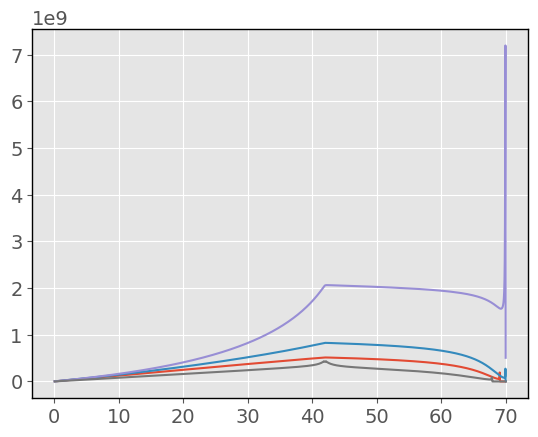

In [9]:
sh_q = spitzer_q_electron(sh)
x = np.ravel(sh['y'].values)

fl_02_q = spitzer_q_electron(fl_02)

fl_006_q = spitzer_q_electron(fl_006)

snb_q = divq_integrate(snb, False)


fig,ax = plt.subplots()

ax.plot(x, sh_q, label='Spitzer-Harm flux')
ax.plot(x, fl_02_q, label='flux limited flux')
ax.plot(x, fl_006_q, label='flux limited flux')
ax.plot(x, snb_q, label='snb flux')

ax.set_xbound(60,70)